In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
rnn = pd.read_csv('result/rnn.csv')
hybrid_rnn = pd.read_csv('result/hybrid_rnn.csv')
GRUs = pd.read_csv('result/GRUs.csv')
hybrid_GRUs = pd.read_csv('result/hybrid_GRUs.csv')

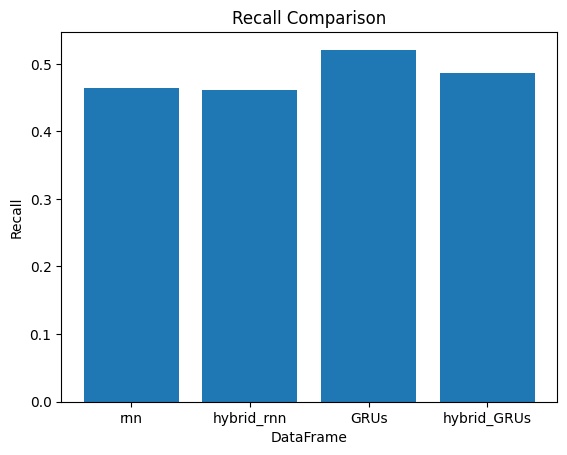

In [14]:
recall_values = [df.loc[1, 'recall'] for df in [rnn, hybrid_rnn, GRUs, hybrid_GRUs]]

plt.bar(['rnn', 'hybrid_rnn', 'GRUs', 'hybrid_GRUs'], recall_values)
plt.xlabel('DataFrame')
plt.ylabel('Recall')
plt.title('Recall Comparison')
plt.show()